## Analizar los datos de Steam para determinar qué características (género y precio) están asociadas a mayor número de propietarios (owners), actividad de jugadores concurrentes y satisfacción. Con el objetivo de dar una recomendación para crear un videojuego.

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import utils

# Expresiones regulares
import re
from fuzzywuzzy import process

Se limpian los datos para trabajar solo con registros válidos. Se calculan columnas numéricas donde era necesario, como owners_mean a partir de rangos

In [2]:
df = pd.read_excel('feb-25-released-games.xlsx')

In [3]:
utils.check_df(df)


¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 63,218 filas y 26 columnas.

##########################################################################################

¿Cuáles son las primeras 5 filas del conjunto de datos?


,name,steam_appid,required_age,controller_support,supported_languages,developers,publishers,platforms,categories,genres,...,currency,owners,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
0,Player City,1537010,0,none,"Portuguese - Brazil, English, Japanese, Italia...",Leandro César Menzen,Menzen Produções,"windows,linux","Single-player,Steam Achievements,Family Sharing","Adventure,Casual,Indie,Simulation",...,USD,"0 .. 20,000",0,0,0,0,0,0,0,0
1,Return,1537080,0,full,"English, German, Spanish - Spain, Traditional ...",Dead Unicorn,Dead Unicorn,windows,"Single-player,Steam Achievements,Full controll...","Adventure,Indie,RPG",...,USD,"0 .. 20,000",0,0,0,0,0,129,19,148
2,Flying Flogger,1537090,0,none,English,Kalashot,Kalashot,windows,"Single-player,Family Sharing","Action,Indie",...,USD,"0 .. 20,000",0,0,0,0,0,6,0,6
3,Nano Fighter Anti Disease,1537340,0,full,"English, Spanish - Spain, Russian, Japanese, S...","LBR games,Integer games","LBR games,Integer games",windows,"Single-player,Steam Achievements,Full controll...","Action,Simulation",...,USD,"0 .. 20,000",0,0,0,0,0,3,1,4
4,Plasma Spheres,1537700,0,full,English,Abnormal Software,Abnormal Software,windows,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Action,Indie",...,USD,"0 .. 20,000",0,0,0,0,0,1,0,1



##########################################################################################

¿Cuáles son las últimas cinco filas del conjunto de datos?


,name,steam_appid,required_age,controller_support,supported_languages,developers,publishers,platforms,categories,genres,...,currency,owners,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
63213,Plastris,1227860,0,none,"English, French, Italian, German, Spanish - Sp...",Khud0,Khud0,"windows,mac,linux","Single-player,Steam Achievements,Family Sharing","Casual,Indie",...,USD,"20,000 .. 50,000",0,0,0,0,0,31,2,33
63214,S0,1227900,0,none,English,CraebTec,CraebTec,windows,"Single-player,Family Sharing","Action,Casual,Indie",...,USD,"0 .. 20,000",0,0,0,0,0,2,0,2
63215,Travel of Heros,1227930,0,none,Simplified Chinese,晶莹工作室,晶莹工作室,windows,"Single-player,Family Sharing","Action,Adventure,Casual,Indie,RPG,Strategy",...,USD,"0 .. 20,000",0,0,0,0,0,1,0,1
63216,Dungeon Looter,1228320,0,none,"English, Japanese, Simplified Chinese, Thai",Wappen Games,Wappen Games,windows,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Indie,RPG",...,USD,"0 .. 20,000",0,0,0,0,1,56,17,73
63217,Megacopter: Blades of the Goddess,1228360,0,full,"English, French, German, Spanish - Spain, Japa...",Pizza Bear Games,Pizza Bear Games,"windows,mac,linux","Single-player,Steam Achievements,Full controll...","Action,Indie",...,USD,"0 .. 20,000",0,0,0,0,0,109,7,116



##########################################################################################

¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,name,steam_appid,required_age,controller_support,supported_languages,developers,publishers,platforms,categories,genres,...,currency,owners,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
44390,QUALIA 3: Multi Agent,290440,0,full,"English, Japanese","Shindenken,EXTREME","KOMODO,MASAYA GAMES",windows,"Single-player,Steam Achievements,Full controll...","Action,Indie",...,USD,"20,000 .. 50,000",0,0,0,0,0,18,15,33
39519,Darksiders Genesis,710920,0,full,"English, French, Italian, German, Spanish - Sp...",Airship Syndicate,THQ Nordic,windows,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure",...,USD,"1,000,000 .. 2,000,000",309,0,171,0,104,7608,1553,9161
29218,Mama Die and Retry,2211800,0,full,English,KnightStudio,KnightStudio,windows,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie",...,USD,"0 .. 20,000",0,0,0,0,0,9,0,9
3746,Quest for Infamy,264560,0,none,English,Infamous Quests,Phoenix Online Publishing,"windows,linux","Single-player,Steam Achievements,Steam Trading...","Adventure,Indie,RPG",...,USD,"50,000 .. 100,000",0,0,0,0,0,102,11,113
62073,Hentai Evilgirls,1139020,0,none,"English, French, Italian, German, Spanish - Sp...","GentleDriver,湖畔",GentleDriver,windows,"Single-player,Steam Achievements,Family Sharing","Casual,Indie,Strategy",...,USD,"0 .. 20,000",0,0,0,0,0,13,10,23



##########################################################################################

¿Cuál es el tipo de datos de cada columna?


name                           object
steam_appid                     int64
required_age                   object
controller_support             object
supported_languages            object
developers                     object
publishers                     object
platforms                      object
categories                     object
genres                         object
release_date           datetime64[ns]
followers                       int64
estimated_wishlists             int64
tags                           object
price                          object
estimated_revenue              object
currency                       object
owners                         object
average_forever                object
average_2weeks                 object
median_forever                 object
median_2weeks                  object
concurrent_users               object
total_positive                 object
total_negative                 object
total_reviews                  object
dtype: objec


##########################################################################################

¿Cuántas columnas hay de cada tipo de datos?


object            22
int64              3
datetime64[ns]     1
Name: count, dtype: int64


##########################################################################################

Variables numéricas:
['steam_appid', 'followers', 'estimated_wishlists']

##########################################################################################

Variables categóricas:
['name', 'required_age', 'controller_support', 'supported_languages', 'developers', 'publishers', 'platforms', 'categories', 'genres', 'release_date', 'tags', 'price', 'estimated_revenue', 'currency', 'owners', 'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks', 'concurrent_users', 'total_positive', 'total_negative', 'total_reviews']

##########################################################################################

¿Cuántos valores únicos tiene cada columna?


name                   62835
steam_appid            63218
required_age              16
controller_support         2
supported_languages    11293
developers             40675
publishers             35572
platforms                  6
categories              4906
genres                  1535
release_date            4562
followers               8972
estimated_wishlists     8972
tags                   54267
price                    329
estimated_revenue      12055
currency                   2
owners                    13
average_forever         1373
average_2weeks           393
median_forever          1295
median_2weeks            400
concurrent_users         990
total_positive          4010
total_negative          1894
total_reviews           4281
dtype: int64


##########################################################################################

Estadísticas descriptivas (numéricas):


,steam_appid,followers,estimated_wishlists
count,6.321800e+04,6.321800e+04,6.321800e+04
mean,1.654556e+06,3.926869e+03,4.712242e+04
std,8.977122e+05,4.538686e+04,5.446423e+05
min,2.400000e+02,0.000000e+00,0.000000e+00
25%,9.213975e+05,3.000000e+01,3.600000e+02
50%,1.563800e+06,1.100000e+02,1.320000e+03
75%,2.403152e+06,6.370000e+02,7.644000e+03
max,3.515770e+06,8.251687e+06,9.902024e+07



##########################################################################################

Estadísticas descriptivas (categóricas):


,release_date
count,63162
mean,2021-04-01 22:58:38.951268096
min,1997-06-30 00:00:00
25%,2019-03-11 00:00:00
50%,2021-10-27 00:00:00
75%,2023-11-23 00:00:00
max,2025-02-22 00:00:00



##########################################################################################



(       steam_appid  followers  estimated_wishlists
 0          1537010         16                  192
 1          1537080       4156                49872
 2          1537090         70                  840
 3          1537340         68                  816
 4          1537700         16                  192
 ...            ...        ...                  ...
 63213      1227860        136                 1632
 63214      1227900         23                  276
 63215      1227930         27                  324
 63216      1228320       1189                14268
 63217      1228360       1941                23292
 
 [63218 rows x 3 columns],
                                     name required_age controller_support  \
 0                            Player City            0               none   
 1                                 Return            0               full   
 2                         Flying Flogger            0               none   
 3              Nano Fighter Anti Disea

In [4]:
df['price']=pd.to_numeric(df['price'], errors='coerce')

In [5]:
df['followers']=pd.to_numeric(df['followers'], errors='coerce')

In [6]:
df['name']=df['name'].astype(str)

In [7]:
df["genres"] = df["genres"].str.split(",")
df = df.explode("genres")

In [8]:
df["developers"] = df["developers"].str.split(";")
df = df.explode("developers")

In [9]:
cols = ['average_forever',
   'average_2weeks',
   'median_forever',
   'median_2weeks',
   'concurrent_users',
   'total_positive',
   'total_negative',
   'total_reviews'] 
df[cols]= df[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
utils.check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 176,309 filas y 26 columnas.

##########################################################################################

¿Cuáles son las primeras 5 filas del conjunto de datos?


,name,steam_appid,required_age,controller_support,supported_languages,developers,publishers,platforms,categories,genres,...,currency,owners,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
0,Player City,1537010,0,none,"Portuguese - Brazil, English, Japanese, Italia...",Leandro César Menzen,Menzen Produções,"windows,linux","Single-player,Steam Achievements,Family Sharing",Adventure,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Player City,1537010,0,none,"Portuguese - Brazil, English, Japanese, Italia...",Leandro César Menzen,Menzen Produções,"windows,linux","Single-player,Steam Achievements,Family Sharing",Casual,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Player City,1537010,0,none,"Portuguese - Brazil, English, Japanese, Italia...",Leandro César Menzen,Menzen Produções,"windows,linux","Single-player,Steam Achievements,Family Sharing",Indie,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Player City,1537010,0,none,"Portuguese - Brazil, English, Japanese, Italia...",Leandro César Menzen,Menzen Produções,"windows,linux","Single-player,Steam Achievements,Family Sharing",Simulation,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Return,1537080,0,full,"English, German, Spanish - Spain, Traditional ...",Dead Unicorn,Dead Unicorn,windows,"Single-player,Steam Achievements,Full controll...",Adventure,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,129.0,19.0,148.0



##########################################################################################

¿Cuáles son las últimas cinco filas del conjunto de datos?


,name,steam_appid,required_age,controller_support,supported_languages,developers,publishers,platforms,categories,genres,...,currency,owners,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
63216,Dungeon Looter,1228320,0,none,"English, Japanese, Simplified Chinese, Thai",Wappen Games,Wappen Games,windows,"Single-player,Multi-player,Co-op,Online Co-op,...",Action,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,1.0,56.0,17.0,73.0
63216,Dungeon Looter,1228320,0,none,"English, Japanese, Simplified Chinese, Thai",Wappen Games,Wappen Games,windows,"Single-player,Multi-player,Co-op,Online Co-op,...",Indie,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,1.0,56.0,17.0,73.0
63216,Dungeon Looter,1228320,0,none,"English, Japanese, Simplified Chinese, Thai",Wappen Games,Wappen Games,windows,"Single-player,Multi-player,Co-op,Online Co-op,...",RPG,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,1.0,56.0,17.0,73.0
63217,Megacopter: Blades of the Goddess,1228360,0,full,"English, French, German, Spanish - Spain, Japa...",Pizza Bear Games,Pizza Bear Games,"windows,mac,linux","Single-player,Steam Achievements,Full controll...",Action,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,109.0,7.0,116.0
63217,Megacopter: Blades of the Goddess,1228360,0,full,"English, French, German, Spanish - Spain, Japa...",Pizza Bear Games,Pizza Bear Games,"windows,mac,linux","Single-player,Steam Achievements,Full controll...",Indie,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,109.0,7.0,116.0



##########################################################################################

¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,name,steam_appid,required_age,controller_support,supported_languages,developers,publishers,platforms,categories,genres,...,currency,owners,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
55418,Gulman 5,805610,0,none,"English, Russian",Aleksandr Serzhantov,Aleksandr Serzhantov,windows,"Single-player,Family Sharing",Action,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,47.0,5.0,52.0
37176,Call of Coronga,1307240,0,none,"English, Portuguese - Brazil, French, Italian,...",Luiz Felipe Da Silva Marian,MushRoom Angels games,windows,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Massively Multiplayer,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,30.0,14.0,44.0
584,Railway Fugitive,2603760,0,none,"English, French, Italian, German, Spanish - Sp...",星之冰工作室,星之冰工作室,windows,"Single-player,Partial Controller Support,Famil...",Action,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0
7800,Interrogation: You will be deceived,1016770,0,full,English,Critique Gaming,Assemble Entertainment,"windows,mac,linux","Single-player,Steam Achievements,Full controll...",Simulation,...,USD,"20,000 .. 50,000",0.0,0.0,0.0,0.0,2.0,228.0,61.0,289.0
20217,Mini Estate,3405200,0,none,"English, Simplified Chinese, French, Italian, ...",Lava Entertainment,Lava Entertainment,windows,"Single-player,Family Sharing",Simulation,...,USD,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0



##########################################################################################

¿Cuál es el tipo de datos de cada columna?


name                           object
steam_appid                     int64
required_age                   object
controller_support             object
supported_languages            object
developers                     object
publishers                     object
platforms                      object
categories                     object
genres                         object
release_date           datetime64[ns]
followers                       int64
estimated_wishlists             int64
tags                           object
price                         float64
estimated_revenue              object
currency                       object
owners                         object
average_forever               float64
average_2weeks                float64
median_forever                float64
median_2weeks                 float64
concurrent_users              float64
total_positive                float64
total_negative                float64
total_reviews                 float64
dtype: objec


##########################################################################################

¿Cuántas columnas hay de cada tipo de datos?


object            13
float64            9
int64              3
datetime64[ns]     1
Name: count, dtype: int64


##########################################################################################

Variables numéricas:
['steam_appid', 'followers', 'estimated_wishlists', 'price', 'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks', 'concurrent_users', 'total_positive', 'total_negative', 'total_reviews']

##########################################################################################

Variables categóricas:
['name', 'required_age', 'controller_support', 'supported_languages', 'developers', 'publishers', 'platforms', 'categories', 'genres', 'release_date', 'tags', 'estimated_revenue', 'currency', 'owners']

##########################################################################################

¿Cuántos valores únicos tiene cada columna?


name                   62836
steam_appid            63218
required_age              16
controller_support         2
supported_languages    11293
developers             40670
publishers             35572
platforms                  6
categories              4906
genres                    34
release_date            4562
followers               8972
estimated_wishlists     8972
tags                   54267
price                    328
estimated_revenue      12055
currency                   2
owners                    13
average_forever         1372
average_2weeks           392
median_forever          1294
median_2weeks            399
concurrent_users         989
total_positive          4009
total_negative          1893
total_reviews           4280
dtype: int64


##########################################################################################

Estadísticas descriptivas (numéricas):


,steam_appid,followers,estimated_wishlists,price,average_forever,average_2weeks,median_forever,median_2weeks,concurrent_users,total_positive,total_negative,total_reviews
count,1.763090e+05,1.763090e+05,1.763090e+05,174410.000000,176303.000000,176303.000000,176303.000000,176303.000000,176303.000000,1.762850e+05,176285.000000,1.762850e+05
mean,1.665064e+06,3.877280e+03,4.652736e+04,10.236131,55.077996,4.217642,45.147921,4.815551,64.345802,9.902039e+02,127.378591,1.117583e+03
std,8.830302e+05,4.154831e+04,4.985797e+05,20.417159,682.041216,83.865500,614.166146,103.193643,1602.559776,1.576746e+04,1895.409136,1.717104e+04
min,2.400000e+02,0.000000e+00,0.000000e+00,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,9.383200e+05,3.200000e+01,3.840000e+02,2.990000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,3.000000e+00
50%,1.564220e+06,1.150000e+02,1.380000e+03,5.990000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,3.000000,1.300000e+01
75%,2.403160e+06,6.600000e+02,7.920000e+03,10.990000,0.000000,0.000000,0.000000,0.000000,0.000000,5.300000e+01,15.000000,7.000000e+01
max,3.515770e+06,8.251687e+06,9.902024e+07,1900.000000,51894.000000,7897.000000,58171.000000,7897.000000,165233.000000,1.573759e+06,222093.000000,1.795852e+06



##########################################################################################

Estadísticas descriptivas (categóricas):


,release_date
count,176211
mean,2021-05-17 03:59:13.664640512
min,1997-06-30 00:00:00
25%,2019-04-19 00:00:00
50%,2021-11-12 00:00:00
75%,2023-12-02 00:00:00
max,2025-02-22 00:00:00



##########################################################################################



(       steam_appid  followers  estimated_wishlists  price  average_forever  \
 0          1537010         16                  192  11.99              0.0   
 0          1537010         16                  192  11.99              0.0   
 0          1537010         16                  192  11.99              0.0   
 0          1537010         16                  192  11.99              0.0   
 1          1537080       4156                49872  15.99              0.0   
 ...            ...        ...                  ...    ...              ...   
 63216      1228320       1189                14268  11.99              0.0   
 63216      1228320       1189                14268  11.99              0.0   
 63216      1228320       1189                14268  11.99              0.0   
 63217      1228360       1941                23292  15.99              0.0   
 63217      1228360       1941                23292  15.99              0.0   
 
        average_2weeks  median_forever  median_2we

In [11]:
utils.identificacion_valores_problem(df)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
tags                   6.67
price                  1.08
publishers             0.07
release_date           0.06
developers             0.03
total_negative         0.01
total_positive         0.01
total_reviews          0.01
categories             0.00
genres                 0.00
required_age           0.00
controller_support     0.00
concurrent_users       0.00
median_2weeks          0.00
median_forever         0.00
average_2weeks         0.00
average_forever        0.00
owners                 0.00
currency               0.00
estimated_revenue      0.00
supported_languages    0.00
steam_appid            0.00
estimated_wishlists    0.00
followers              0.00
platforms              0.00
name                   0.00
dtype: float64
###################################################################################
3.1.2. Núme

In [12]:
df = df.dropna()

In [13]:
df = df.drop_duplicates()

Grado de satisfacción

In [14]:
df['satisfacción'] = (df['total_positive'] / df['total_reviews'])*100

## Analisi sobre OWNERS. Representa éxito comercial

In [15]:
owners_split = (
    df["owners"]
    .str.replace(",", "", regex=False)
    .str.split(" .. ", expand=True)
)

df["owners_mean"] = (
    pd.to_numeric(owners_split[0], errors="coerce") +
    pd.to_numeric(owners_split[1], errors="coerce")
) / 2

df=df.drop_duplicates()

In [16]:
df.owners_mean.describe()

count    1.625880e+05
mean     8.797439e+04
std      9.893398e+05
min      1.000000e+04
25%      1.000000e+04
50%      1.000000e+04
75%      3.500000e+04
max      7.500000e+07
Name: owners_mean, dtype: float64

(array([1.61749e+05, 0.00000e+00, 5.76000e+02, 0.00000e+00, 1.39000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.30000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 4.90000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([1.00000e+04, 1.50980e+06, 3.00960e+06, 4.50940e+06, 6.00920e+06,
        7.50900e+06, 9.00880e+06, 1.05086e+07, 1.20084e+07, 1.35082e+07,
        1.50080e+07, 1.65078e+07, 1.80076e+07, 1.95074e+07, 2.10072e+07,
        2.25070e+07, 2.40068e+07, 2.55066e+07, 2.

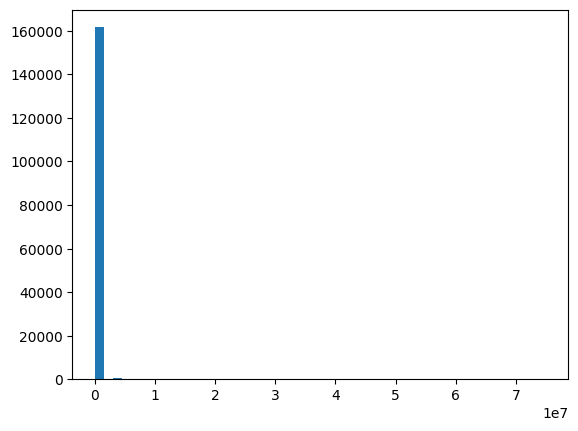

In [17]:
plt.hist(df["owners_mean"], bins=50)


en log para ya que la mayoria de ventas estan en pocos juegos y así se ve mejor la distribución de owners

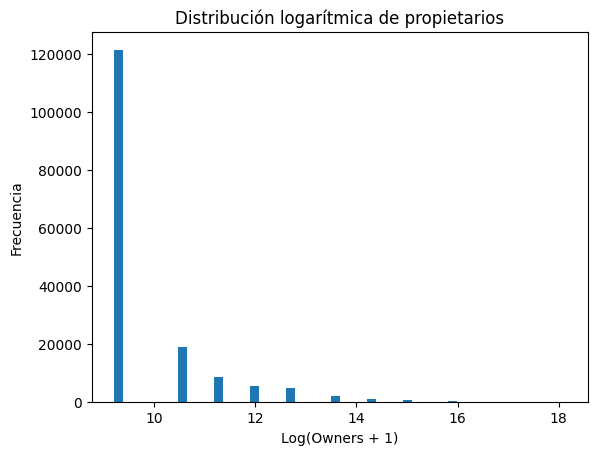

In [18]:
plt.hist(np.log1p(df["owners_mean"]), bins=50)
plt.xlabel("Log(Owners + 1)")
plt.ylabel("Frecuencia")
plt.title("Distribución logarítmica de propietarios")
plt.show()

top 10 juegos con mas Owners

In [19]:
top_10_owners=(
    df.groupby("name")["owners_mean"]
      .sum() 
      .reset_index()
      .sort_values(by='owners_mean', ascending=False)
      .head(10)
)
top_10_owners




,name,owners_mean
33910,Palworld,375000000.0
31823,New World: Aeternum,300000000.0
5627,Black Myth: Wukong,225000000.0
52800,Wallpaper Engine,210000000.0
13563,Don't Starve Together,210000000.0
51992,Valheim,175000000.0
39175,Rust,175000000.0
1193,ARK: Survival Evolved,175000000.0
26131,Last Epoch,140000000.0
47258,The Forest,140000000.0


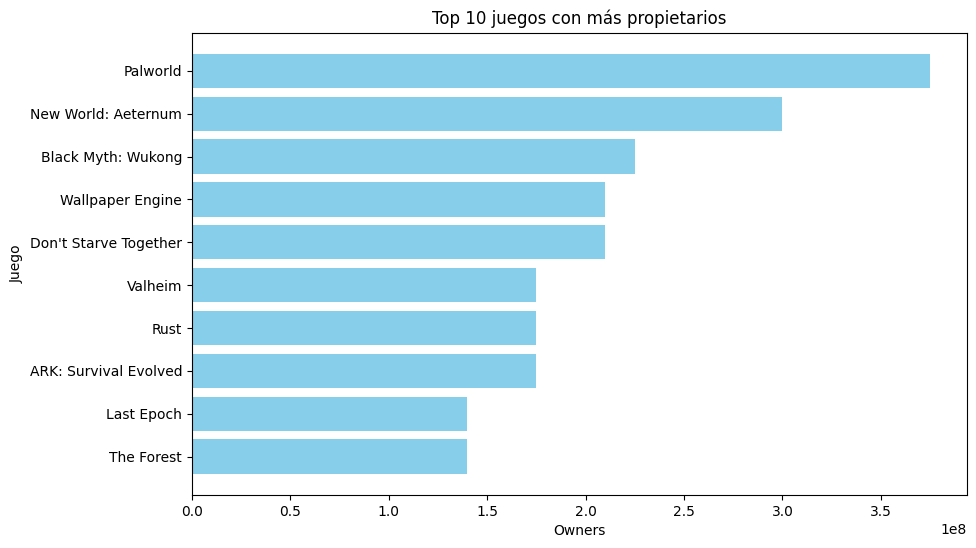

In [20]:
plt.figure(figsize=(10,6))
plt.barh(top_10_owners["name"], top_10_owners["owners_mean"], color="skyblue")
plt.xlabel("Owners")
plt.ylabel("Juego")
plt.title("Top 10 juegos con más propietarios")
plt.gca().invert_yaxis()
plt.show()


La distribución es muy desigual: unos pocos juegos concentran la mayoría de propietarios.

Un pequeño número de juegos domina el mercado.

## Concurrent_users

In [21]:
df.concurrent_users.describe()

count    162588.000000
mean         62.306105
std        1548.969346
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      165233.000000
Name: concurrent_users, dtype: float64

(array([1.62163e+05, 1.39000e+02, 7.40000e+01, 3.90000e+01, 3.50000e+01,
        2.00000e+01, 2.10000e+01, 8.00000e+00, 2.50000e+01, 6.00000e+00,
        7.00000e+00, 7.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        3.00000e+00, 1.20000e+01, 3.00000e+00, 0.00000e+00, 8.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 6.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00]),
 array([     0.  ,   3304.66,   6609.32,   9913.98,  13218.64,  16523.3 ,
         19827.96,  23132.62,  26437.28,  29741.94,  33046.6 ,  36351.26,
         39655.92,  42960.58,  46265.24,  49569.9 ,  52874.56,  56179.22,
         59483.88,  62788.54,  66093.2 ,  6939

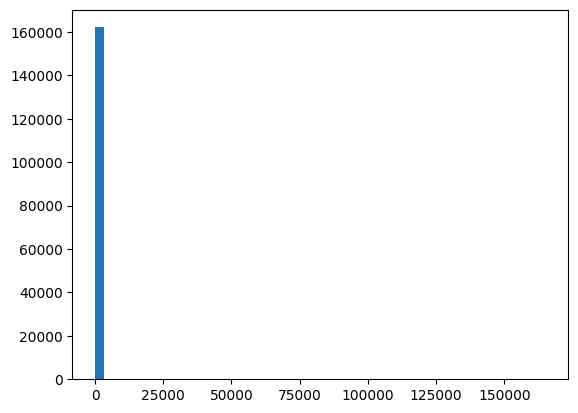

In [22]:
plt.hist(df["concurrent_users"], bins=50)

se usa log para visualizar mejor la mayoría de juegos con valores bajos y pocos con valores muy altos.

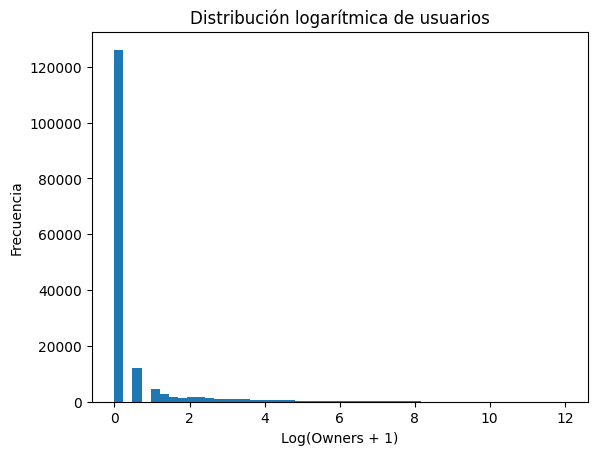

In [23]:
plt.hist(np.log1p(df["concurrent_users"]), bins=50)
plt.xlabel("Log(Owners + 1)")
plt.ylabel("Frecuencia")
plt.title("Distribución logarítmica de usuarios")
plt.show()

In [24]:
top_10_concurrent=(
    df.groupby('name')['concurrent_users']
    .sum()
    .reset_index()
    .sort_values(by='concurrent_users', ascending=False)
    .head(10)
)
top_10_concurrent

,name,concurrent_users
39175,Rust,826165.0
52800,Wallpaper Engine,525420.0
10517,Crosshair X,505116.0
34239,Path of Exile 2,317400.0
25307,Kingdom Come: Deliverance II,269724.0
13563,Don't Starve Together,233148.0
17853,Football Manager 2024,176310.0
33910,Palworld,168255.0
571,7 Days to Die,166206.0
4484,Baldur's Gate 3,161178.0


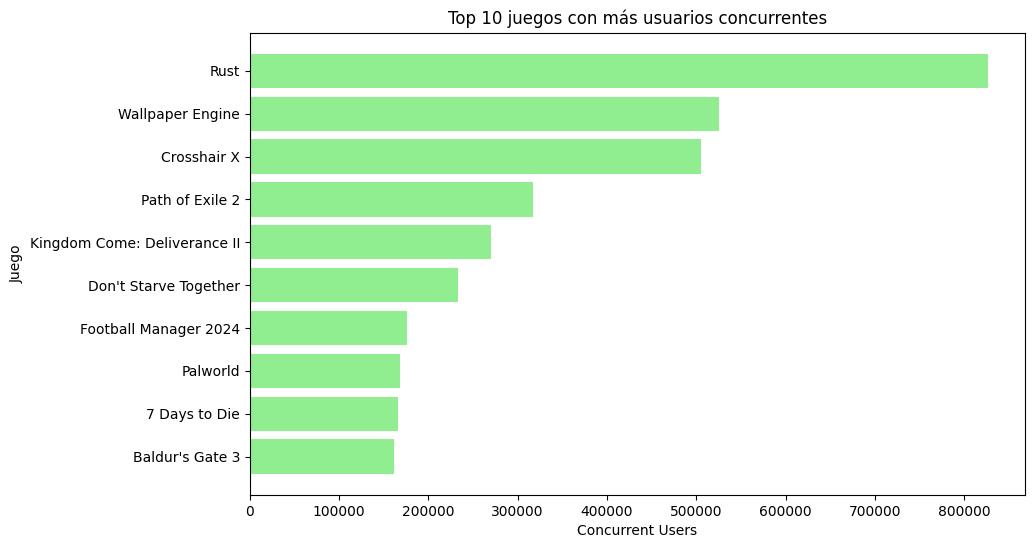

In [25]:
plt.figure(figsize=(10,6))
plt.barh(top_10_concurrent["name"], top_10_concurrent["concurrent_users"], color="lightgreen")
plt.xlabel("Concurrent Users")
plt.ylabel("Juego")
plt.title("Top 10 juegos con más usuarios concurrentes")
plt.gca().invert_yaxis()
plt.show()


Un juego puede tener muchos owners pero pocos concurrent users → indica ventas iniciales fuertes pero poca retención.

Juegos con alta actividad concurrente suelen ser multijugador o cooperativo

## Satisfacción

Para evitar sesgos por pocos datos, solo se consideran juegos con un mínimo reseñas (la media). Esto asegura que la métrica de satisfacción refleje la opinión de una base significativa de jugadores.

In [26]:
df_satisf = df[df["total_reviews"] >= df["total_reviews"].mean()].copy()

In [27]:
juegos_mas_satisfacción = (
    df_satisf.groupby('name')['satisfacción']
    .mean()
    .reset_index()
    .sort_values(by='satisfacción', ascending=False)
    .head(20)
)
juegos_mas_satisfacción

,name,satisfacción
179,Aokana - Four Rhythms Across the Blue - EXTRA2,99.732858
45,A Tower Full of Cats,99.477655
800,Dialtown: Phone Dating Sim,99.412456
2924,Super Lesbian Animal RPG,99.385426
2193,Papa's Freezeria Deluxe,99.305066
240,Aventura Copilului Albastru și Urât,99.304912
3226,The Upturned,99.286394
2734,Smushi Come Home,99.261249
3228,The Void Rains Upon Her Heart,99.201278
41,A Short Hike,99.189627


c:\Users\diego\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


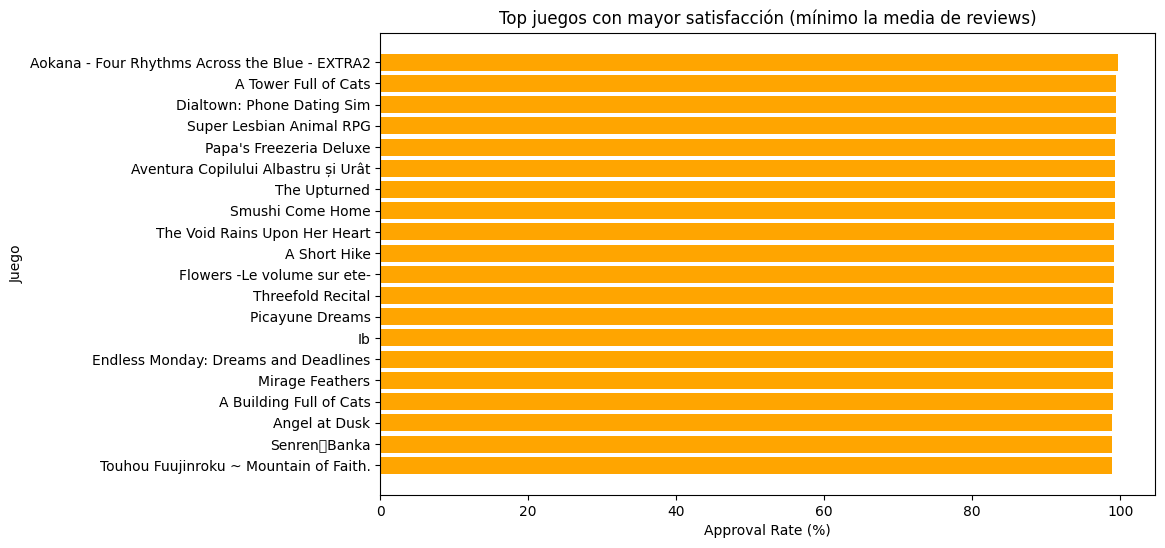

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(juegos_mas_satisfacción["name"], juegos_mas_satisfacción["satisfacción"], color="orange")
plt.xlabel("Approval Rate (%)")
plt.ylabel("Juego")
plt.title("Top juegos con mayor satisfacción (mínimo la media de reviews)")
plt.gca().invert_yaxis()
plt.show()


## Genero

Se analiza qué géneros son más exitosos en Steam, combinando ventas, actividad y satisfacción.

In [29]:
( 
    df['genres']
    .value_counts()
    .reset_index()
    .sort_values(by='count', ascending=False)
    .head(10)
)

,genres,count
0,Indie,41453
1,Casual,24600
2,Action,24564
3,Adventure,23547
4,Simulation,12002
5,Strategy,11688
6,RPG,10322
7,Early Access,6061
8,Sports,2686
9,Racing,2312


In [30]:
genre_stats = ( df.groupby('genres')
               .agg({
                    'owners_mean':'mean',
                    'concurrent_users':'mean',
                    'satisfacción': 'mean'})
                    .reset_index()
                    .sort_values(by='owners_mean', ascending=False)
)
genre_stats


,genres,owners_mean,concurrent_users,satisfacción
19,Photo Editing,426010.638298,1544.234043,73.492237
16,Massively Multiplayer,346198.757764,528.617391,62.539611
33,undefined,256567.164179,37.910448,68.246669
4,Animation & Modeling,196048.034934,685.257642,69.162535
7,Design & Illustration,155542.763158,522.105263,69.622932
20,RPG,146734.160047,108.020829,73.972885
29,Utilities,119764.705882,404.360784,69.870737
2,Action,117107.352223,69.915323,75.163332
24,Simulation,101771.371438,99.409432,71.106759
3,Adventure,100476.918503,56.685608,75.321235


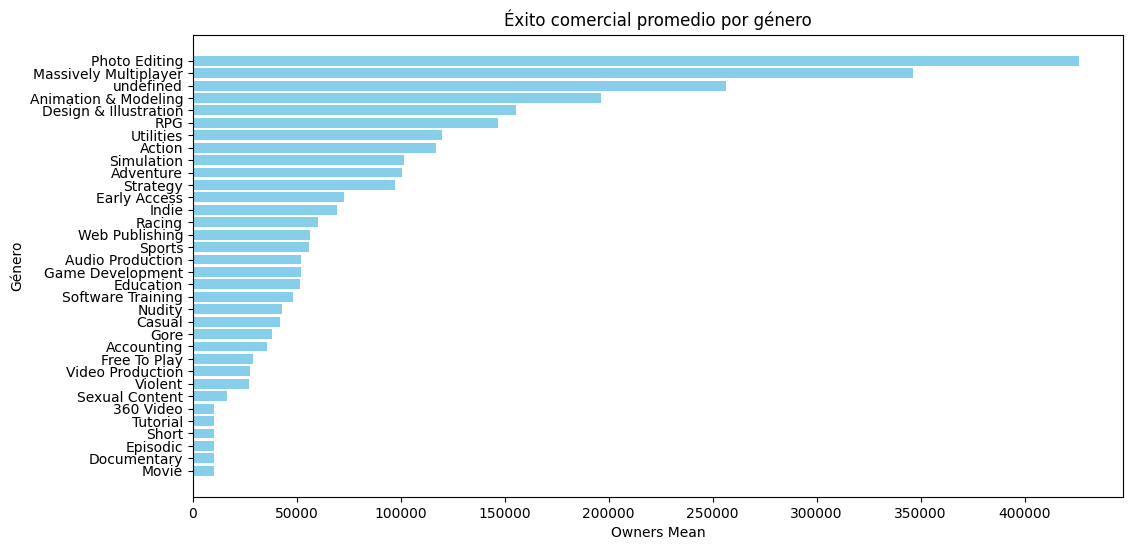

In [31]:


plt.figure(figsize=(12,6))
plt.barh(genre_stats["genres"], genre_stats["owners_mean"], color="skyblue")
plt.xlabel("Owners Mean")
plt.ylabel("Género")
plt.title("Éxito comercial promedio por género")
plt.gca().invert_yaxis()
plt.show()


Photo Editing y multiplayes massivos son los genero con mayor éxito comercial.

In [32]:
genre_stats_con = ( df.groupby('genres')
               .agg({
                    'owners_mean':'mean',
                    'concurrent_users':'mean',
                    'satisfacción': 'mean'})
                    .reset_index()
                    .sort_values(by='concurrent_users', ascending=False)
)
genre_stats_con

,genres,owners_mean,concurrent_users,satisfacción
19,Photo Editing,426010.638298,1544.234043,73.492237
4,Animation & Modeling,196048.034934,685.257642,69.162535
16,Massively Multiplayer,346198.757764,528.617391,62.539611
7,Design & Illustration,155542.763158,522.105263,69.622932
29,Utilities,119764.705882,404.360784,69.870737
13,Game Development,51783.439490,379.063694,70.084868
10,Education,51613.756614,364.079365,66.234759
5,Audio Production,52198.275862,179.370690,72.571372
20,RPG,146734.160047,108.020829,73.972885
25,Software Training,48214.285714,105.489796,68.665168


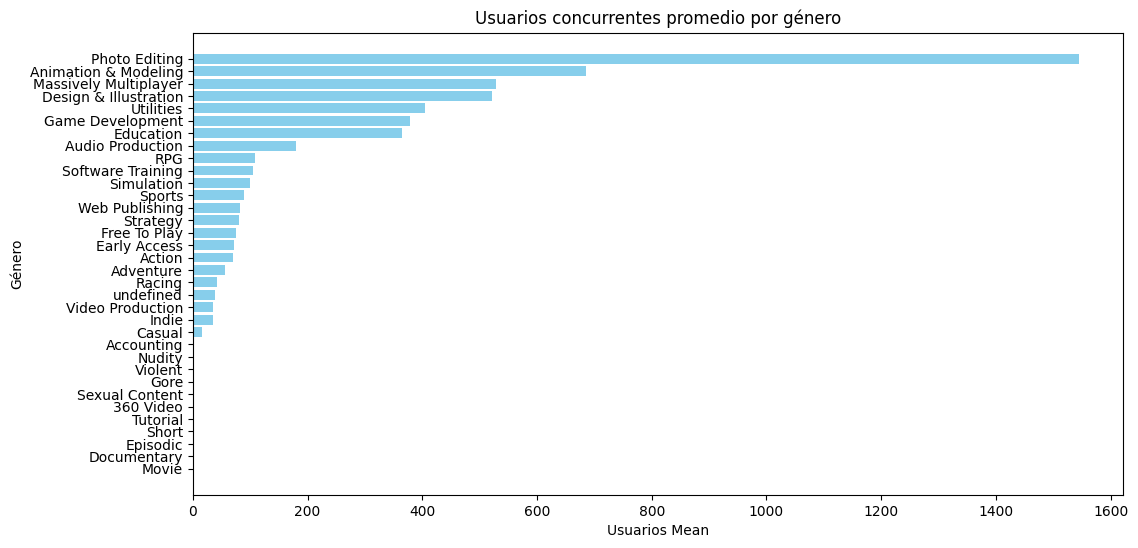

In [33]:
plt.figure(figsize=(12,6))
plt.barh(genre_stats_con["genres"], genre_stats_con["concurrent_users"], color="skyblue")
plt.xlabel("Usuarios Mean")
plt.ylabel("Género")
plt.title("Usuarios concurrentes promedio por género")
plt.gca().invert_yaxis()
plt.show()

Como vemos, 'Photo Editing' es el genero con usuarios mas concurrentes, seguidos de animationes y multiplayer massivos.

In [34]:
genre_stats_sat = ( df.groupby('genres')
               .agg({
                    'owners_mean':'mean',
                    'concurrent_users':'mean',
                    'satisfacción': 'mean'})
                    .reset_index()
                    .sort_values(by='satisfacción', ascending=False)
)
genre_stats_sat

,genres,owners_mean,concurrent_users,satisfacción
1,Accounting,35625.000000,1.500000,79.435429
6,Casual,42127.235772,15.317642,77.088660
15,Indie,69509.926905,34.194437,76.267294
3,Adventure,100476.918503,56.685608,75.321235
2,Action,117107.352223,69.915323,75.163332
0,360 Video,10000.000000,0.000000,75.000000
11,Episodic,10000.000000,0.000000,75.000000
28,Tutorial,10000.000000,0.000000,75.000000
23,Short,10000.000000,0.000000,75.000000
17,Movie,10000.000000,0.000000,75.000000


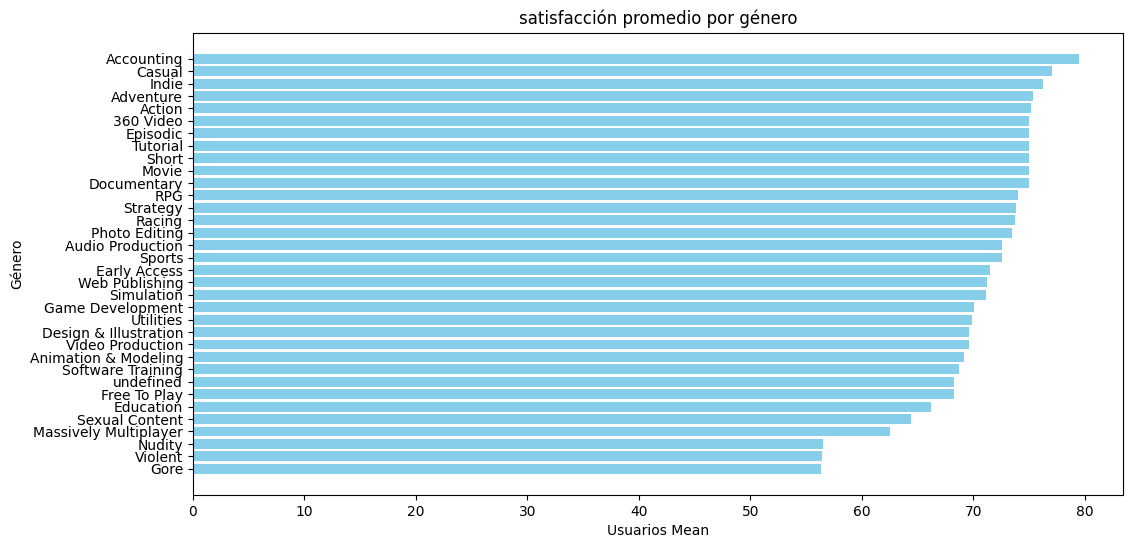

In [35]:
plt.figure(figsize=(12,6))
plt.barh(genre_stats_sat["genres"], genre_stats_sat["satisfacción"], color="skyblue")
plt.xlabel("Usuarios Mean")
plt.ylabel("Género")
plt.title("satisfacción promedio por género")
plt.gca().invert_yaxis()
plt.show()

Juegos de Accounting, casuales y Indies son los generos con mayor satisfacción de Steam

## Analisi Precio

Para el analisi de precio, creamos rangos de precio.

In [36]:
df.price.describe()

count    162588.000000
mean         10.362225
std          20.991842
min           0.900000
25%           2.990000
50%           5.990000
75%          10.990000
max        1900.000000
Name: price, dtype: float64

In [37]:

bins = [0, 2.99, 5.99, 10.99, 20, 50, 100, 200, 500, 1000, 2000]
labels = ["<=2.99", "3-5.99", "6-10.99", "11-20", "21-50", "51-100", "101-200", "201-500", "501-1000", ">1000"]

df["precio_rango"] = pd.cut(df["price"], bins=bins, labels=labels, include_lowest=True)


In [38]:
precio_stats = (
    df.groupby('precio_rango').agg({
        'owners_mean' : 'mean',
        'concurrent_users' : 'mean',
        'satisfacción' : 'mean'
    })
    .reset_index()
    .sort_values(by='concurrent_users', ascending=False)
)
precio_stats

C:\Users\diego\AppData\Local\Temp\ipykernel_18612\4173436618.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('precio_rango').agg({


,precio_rango,owners_mean,concurrent_users,satisfacción
5,51-100,1.702330e+06,2371.179450,72.500023
4,21-50,4.103348e+05,490.584888,77.134862
3,11-20,1.595568e+05,76.997673,76.021068
2,6-10.99,6.122146e+04,33.030369,75.307589
1,3-5.99,3.875563e+04,22.565534,74.760765
7,201-500,1.000000e+04,18.714286,77.478349
6,101-200,1.076896e+04,0.772532,74.966503
0,<=2.99,2.653241e+04,0.653284,73.444263
8,501-1000,1.000000e+04,0.000000,95.238095
9,>1000,1.000000e+04,0.000000,NaN


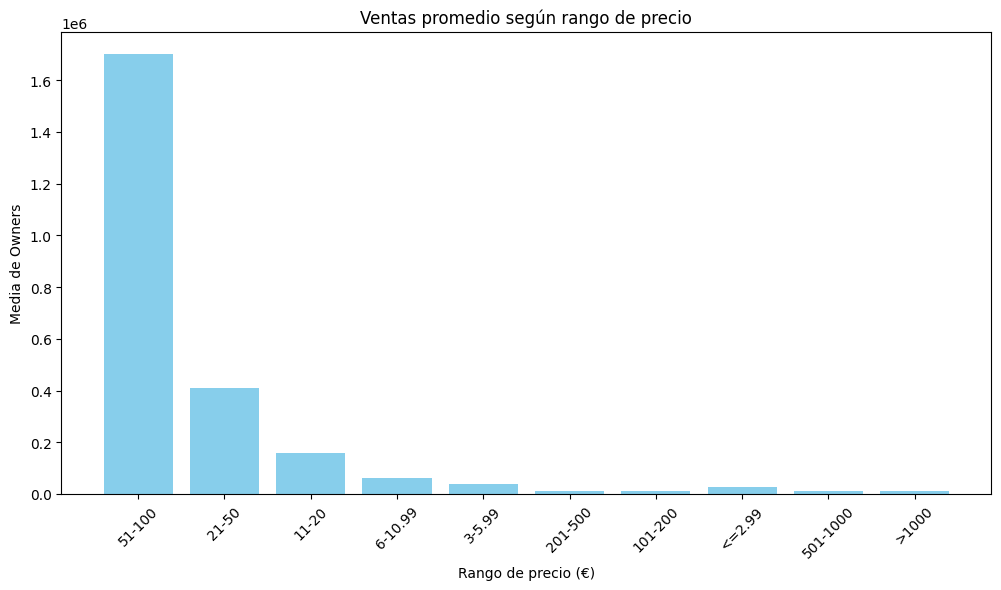

In [39]:

plt.figure(figsize=(12,6))
plt.bar(precio_stats["precio_rango"], precio_stats["owners_mean"], color="skyblue")
plt.xlabel("Rango de precio (€)")
plt.ylabel("Media de Owners")
plt.title("Ventas promedio según rango de precio")
plt.xticks(rotation=45)
plt.show()


Los juegos con precios entre 51-100 euros son los mas vendidos

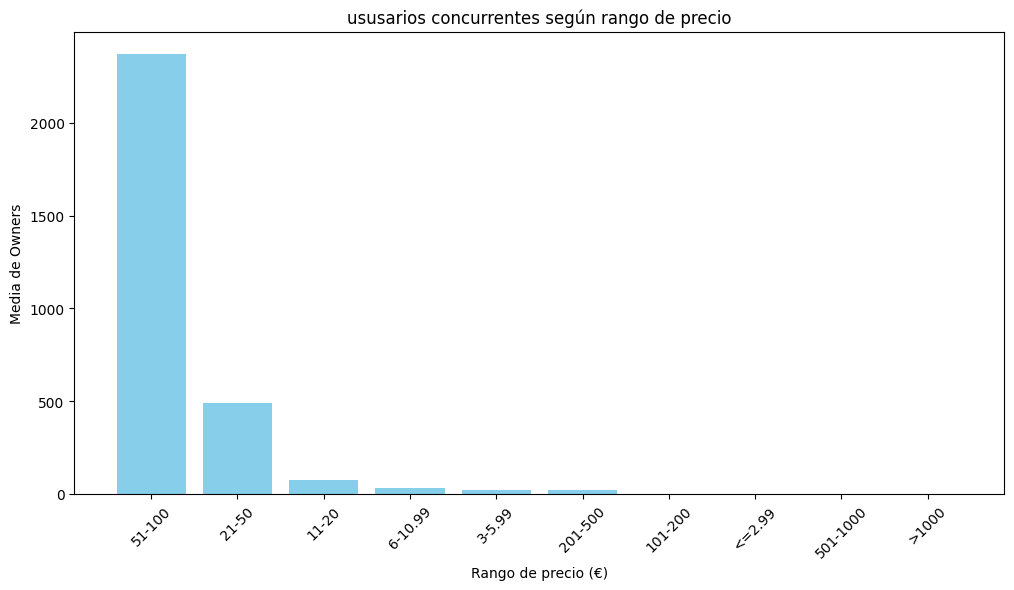

In [40]:
plt.figure(figsize=(12,6))
plt.bar(precio_stats["precio_rango"], precio_stats["concurrent_users"], color="skyblue")
plt.xlabel("Rango de precio (€)")
plt.ylabel("Media de Owners")
plt.title("ususarios concurrentes según rango de precio")
plt.xticks(rotation=45)
plt.show()

Ademas de ser los mas vendidos, los juegos entre 51-100 € son los que tienen mas usuarios concurrentes

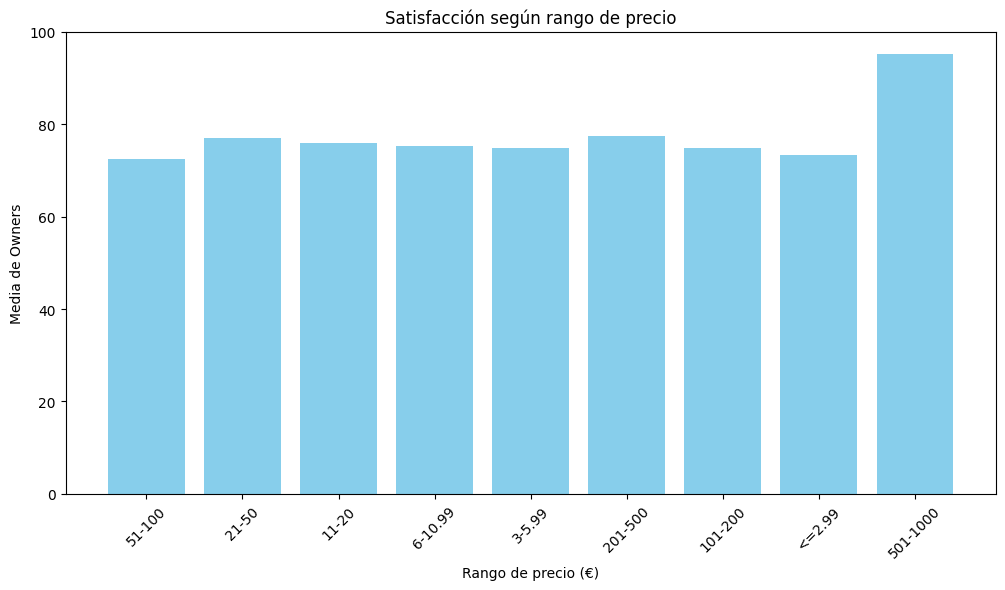

In [41]:
plt.figure(figsize=(12,6))
plt.bar(precio_stats["precio_rango"], precio_stats["satisfacción"], color="skyblue")
plt.xlabel("Rango de precio (€)")
plt.ylabel("Media de Owners")
plt.title("Satisfacción según rango de precio")
plt.xticks(rotation=45)
plt.show()

Se agrupan los precios en rangos para analizar cómo influyen en ventas, engagement y satisfacción. Los datos muestran que la mayoría de juegos exitosos se concentran en precios que oscilan entre 51-100.  Mientras que los valores muy altos son excepcionales y no determinan patrones de éxito.


In [42]:
genero_precio = (
    df.groupby(["genres", "precio_rango"])
             .agg({
                 "owners_mean":"mean",
                 "concurrent_users":"mean",
                 "satisfacción":"mean"
             })
             .reset_index()
             .dropna()
)
genero_precio

C:\Users\diego\AppData\Local\Temp\ipykernel_18612\1751948926.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["genres", "precio_rango"])


,genres,precio_rango,owners_mean,concurrent_users,satisfacción
0,360 Video,<=2.99,1.000000e+04,0.000000,75.000000
10,Accounting,<=2.99,1.000000e+04,0.000000,77.380952
13,Accounting,11-20,7.833333e+04,4.000000,67.780192
15,Accounting,51-100,1.000000e+04,0.000000,100.000000
20,Action,<=2.99,2.769632e+04,0.685453,73.211543
...,...,...,...,...,...
331,undefined,3-5.99,4.347826e+04,0.608696,63.902756
332,undefined,6-10.99,1.067647e+05,20.588235,68.407421
333,undefined,11-20,1.160455e+06,123.272727,79.099335
334,undefined,21-50,2.075000e+05,203.500000,67.927820


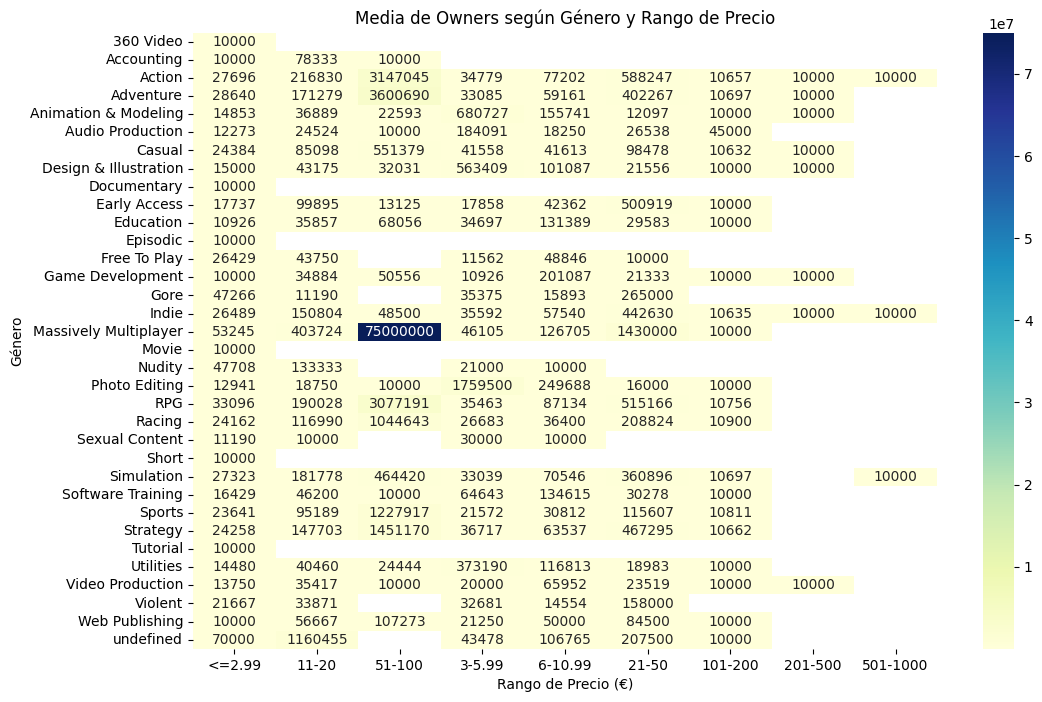

In [43]:


heatmap_data = genero_precio.pivot(index="genres", columns="precio_rango", values="owners_mean")


plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Media de Owners según Género y Rango de Precio")
plt.xlabel("Rango de Precio (€)")
plt.ylabel("Género")
plt.show()


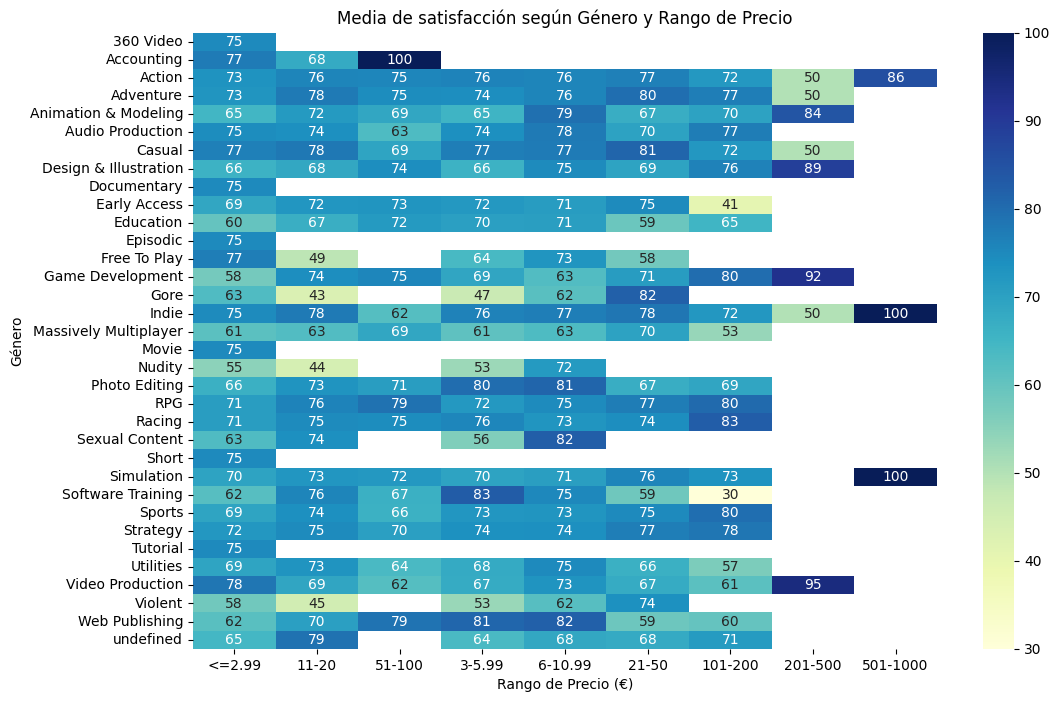

In [44]:
heatmap_data = genero_precio.pivot(index="genres", columns="precio_rango", values="satisfacción")


plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Media de satisfacción según Género y Rango de Precio")
plt.xlabel("Rango de Precio (€)")
plt.ylabel("Género")
plt.show()

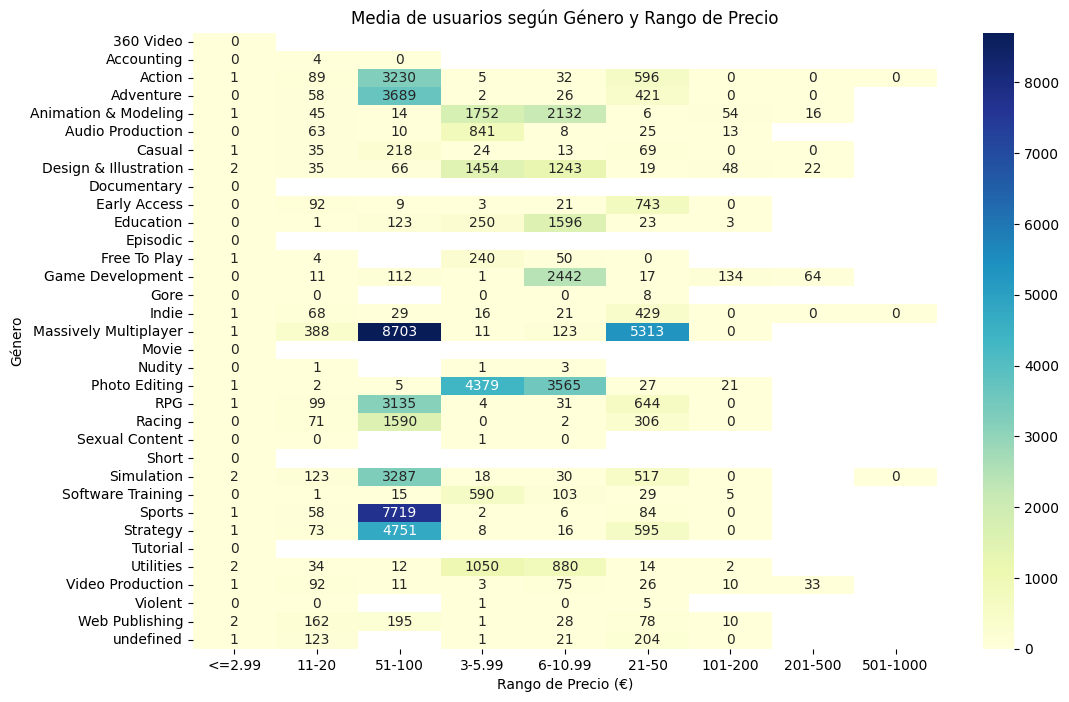

In [45]:
heatmap_data = genero_precio.pivot(index="genres", columns="precio_rango", values="concurrent_users")


plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Media de usuarios según Género y Rango de Precio")
plt.xlabel("Rango de Precio (€)")
plt.ylabel("Género")
plt.show()

## Conclusión:
Tras analizar los datos  de Steam, se pueden extraer varios patrones relevantes para el diseño de un nuevo videojuego exitoso.

La distribución de propietarios (owners) muestra una fuerte concentración: un pequeño número de juegos domina el mercado.

El análisis de concurrent_users revela que no todos los juegos con altas ventas mantienen una alta actividad. Algunos títulos presentan muchas ventas iniciales pero baja retención, mientras que los juegos multijugador, cooperativos o con componente online tienden a mantener mayor actividad concurrente.

Para la métrica de satisfacción, se aplicó una restricción mínima de reseñas para evitar sesgos derivados de juegos con pocas valoraciones. Esto permitió obtener resultados más representativos del mercado.

Sobre Generos:
- Photo Editing y Massively Multiplayer son los géneros con mayor éxito comercial y mayor número de usuarios concurrentes.
- Accounting, Casual e Indie destacan por tener las mayores tasas de satisfacción.

Sobre Precio óptimo:
- El análisis por rangos de precio muestra que los juegos en el rango 51–100 €:
    - Son los más vendidos.
    - Tienen mayor número de usuarios concurrentes.

- Representan el segmento más sólido en términos de éxito comercial.

- Los precios extremadamente altos son casos aislados y no representan un patrón general de éxito.

Recomendación por si quieres crear un videojuego:

Si una empresa quisiera lanzar un nuevo videojuego maximizando sus probabilidades de éxito en Steam, los datos sugieren:

Apostar por un género con alta demanda y capacidad de retención (por ejemplo, Massively Multiplayer).

Posicionarlo en un rango de precio entre 51–100 €.

Diseñar mecánicas que fomenten actividad concurrente sostenida.

Esta recomendación se basa en el análisis combinado de ventas, engagement y satisfacción histórica del mercado